# <center> MAS 332L Lab 4.4: Ocean Acidification </center>

## Objectives

1. Understand the marine CO2 system
2. Examine long-term trends in ocean pH and pCO2
3. Fit a simple linear regression model to quantify rates of change


### Acknowledgements

Please acknowledge that you understand the instructions by copying and pasting each of the following into the next cells.

#I understand how to save my progress and reopen the notebook.

#I understand that I am being asked to save and submit copies of my notebook as well as a figure of my choice for the assignment.

#I understand that I need to comment my code.

In [ ]:
#I understand how to save my progress and reopen the notebook.

In [ ]:
#I understand that I am being asked to save and submit copies of my notebook as well as a figure of my choice for the assignment.

In [ ]:
#I understand that I need to comment my code.

## <center>What are the long-term trends in ocean pH and pCO2?

For this exercise, we will be using the data from HOT to take a closer look at ocean acidification and the repercussions of greenhouse gases in the marine environment. The background information for this part was in your handouts, so let's launch right in. Figure 1 should be very familiar as you've seen it already, but this is the actual data we will be analyzing today. We will be doing a simple, linear analysis that should be easy but useful and informative in understanding the trends and developing your coding skills.

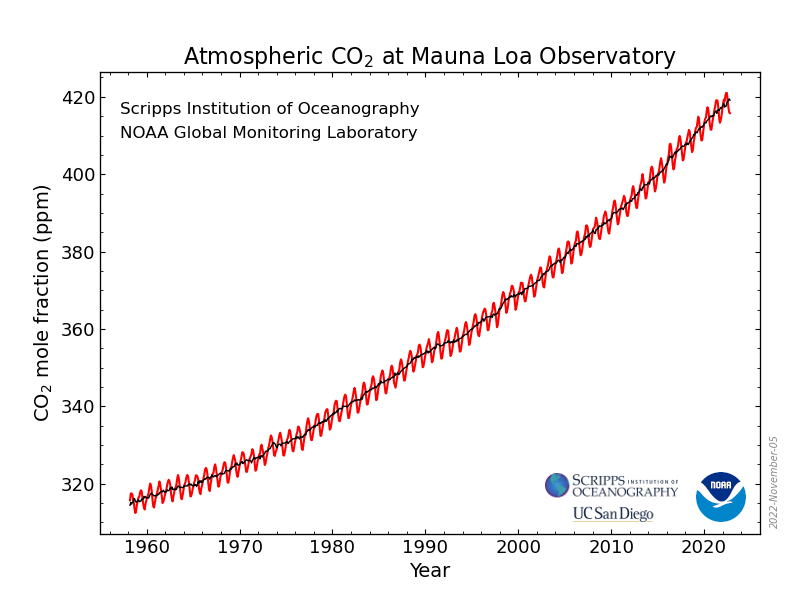

<center> Figure 1: all CO2 measurements from the Mauna Loa Conservatory. </center>

---
###### A note about copying and pasting code in this assignment:

In this assignment, you are provided code in markdown cells highlighted in gray `like this`. Copy and paste `the given code`, modifying where asked, into the coding cell below. Add more cells as necessary. 

There are also several times in this assignment where we ask you to rerun some code. You will have to copy and paste the right code from earlier in the assignment into a new cell and modify variable names or add a section as asked.

We tried to make this as clear as possible. Code will be provided in blocks of gray text. Each time you are asked to either run code or answer a question is numbered. Each numbered task will be graded for completion and accuracy.

You have all the information you should need, but remember you can always ask questions!

---
### Import packages

Time to get started! Let's import the packages we need. Note that there are couple new packages!

In [1]:
#Import Pandas and alias it as 'pd'
#for manipulating tables and timeseries
import pandas as pd

#Import MatPlotLib and alias it as 'plt'
#for making plots/graphs/figures
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # we need this for doing date manipulations

#Import Numpy and alias it as 'np'
#for the arrays
import numpy as np

#Import Linear Regression 
from sklearn.linear_model import LinearRegression

#Import date to change datetimes to serial date numbers
from datetime import date


C:\Users\alexa\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Read in the data

Upload the excel files HOT_data.xlsx to your Jupyter home directory.

1. Read in the file using the `pd.read_excel('filename')` command we have used in previous labs, and name it HOT:

`HOT = pd.read_excel('HOT_data.xlsx')`

2. Take a look at the data for HOT

`HOT`

In [2]:
HOT = pd.read_excel('HOT_data.xlsx') #read in data

In [3]:
HOT #display

,year,month,day,hour,minute,datetime,datenum,pH,alk,pCO2
0,1989,1,8,10,40,'08-Jan-1989 10:40:34',726476.444838,8.099009,2305,331.604355
1,1990,6,13,7,13,'13-Jun-1990 07:13:42',726997.301181,8.108123,2308,323.874888
2,1990,6,13,7,10,'13-Jun-1990 07:10:03',726997.298646,8.113192,2312,319.011296
3,1990,7,25,9,55,'25-Jul-1990 09:55:15',727039.413368,8.095462,2291,332.690670
4,1990,7,25,9,53,'25-Jul-1990 09:53:32',727039.412176,8.095412,2292,332.520436
...,...,...,...,...,...,...,...,...,...,...
560,2020,9,28,7,3,'28-Sep-2020 07:03:40',738062.294213,8.032373,2282,396.129704
561,2020,11,20,7,31,'20-Nov-2020 07:31:21',738115.313438,8.051301,2293,377.877663
562,2020,11,20,7,28,'20-Nov-2020 07:28:10',738115.311227,8.051810,2293,376.529099
563,2020,12,19,7,14,'19-Dec-2020 07:14:58',738144.302060,8.053036,2296,377.088303


### Answer the following questions:

3. What variables are there in the HOT data? *Hint:* look at the column names


The **datenum** variable in the HOT data represents the datetime as a seralized number, with 0 = January 0, 0000. In this way, each datetime has a unique number assigned to it. This will be necessary when we run a simple linear regression model in Exercise 3. The regression model cannot be run using x values that are dates. 

4. How long is the HOT dataset?

In [ ]:
##3. year, month, day, hour, minute, datetime, datenum, pH, alk, pCO2
##4. 31 years

### Now let's plot the pH from the HOT data

5. Plot pH versus datetime using the following code:

`fig1, (ax1) = plt.subplots(figsize = (20,5)) 
 ax1.plot(HOT['datetime'],HOT['pH'])`
 
This will take several seconds to run.


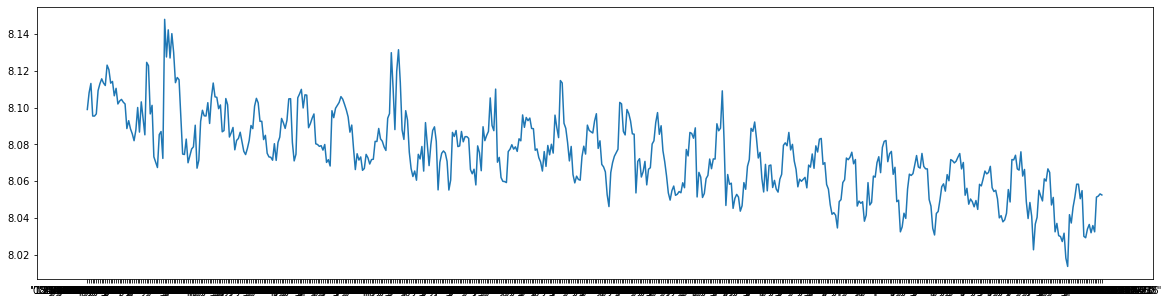

In [4]:
#5.
fig1, (ax1) = plt.subplots(figsize = (20,5)) 
ax1.plot(HOT['datetime'],HOT['pH']) #plotting datetime vs pH

### Can we make the plot better?

6. How does this plot look to you? Specifically, is there anything wrong with the x-axis?


7. `HOT['datetime']` is not a datetime object. Thus, matplotlib does not naturally make the date ticks spaced out in a legible way. But we have the year, month, day, etc, already separated out in columns. So we can easily make a datetime object like we have done before. We will do this by copying the timestamp data to a new dataframe and using the `to_datetime` function. Execute the code below:

`df_dateHOT = HOT[['year', 'month', 'day', 'hour', 'minute']]
HOTdates = pd.to_datetime(df_dateHOT)`

8. Now, rerun the pH plot for the HOT data using `HOTdates` instead of `HOT['datetime']` as the x variable.

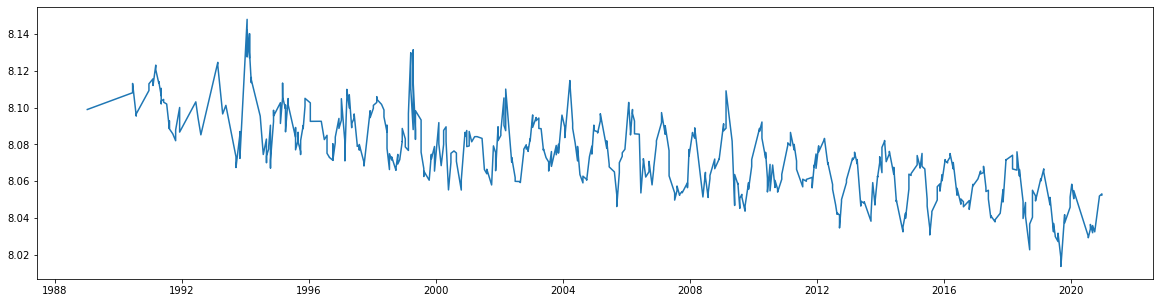

In [5]:
##6. Can't read the x axis
#7.
df_dateHOT = HOT[['year', 'month', 'day', 'hour', 'minute']] #reset column names to datetime requirement
HOTdates = pd.to_datetime(df_dateHOT) #convert
#8.
fig1, (ax1) = plt.subplots(figsize = (20,5)) 
ax1.plot(HOTdates, HOT['pH']) #replot using just years on the x-axis

9. Ok the new plot looks good, but let's make the x ticks go by every 5 years. We can use a date manipulation package that we imported at the beginning of this lab. What is the name of the date manipulation package we imported?


10. Ok now add the following code to your code from #8 to have the x ticks be every 5 years:

`ax1.xaxis.set_major_locator(mdates.YearLocator(5))`


Text(0, 0.5, 'pH')

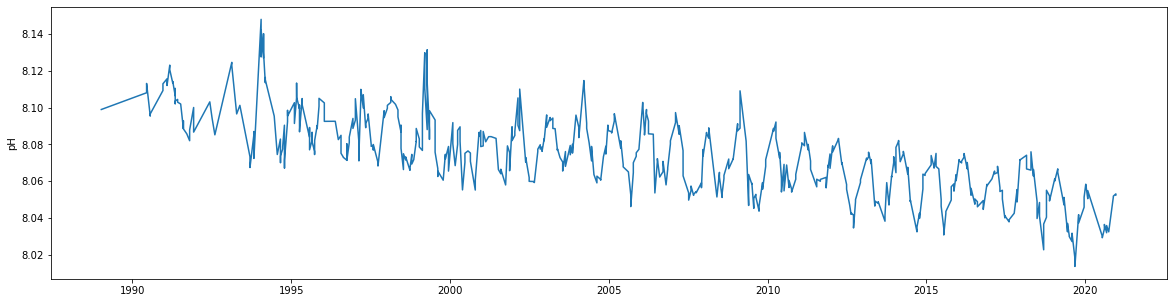

In [6]:
#9. matplotlib.dates as mdates

fig1, (ax1) = plt.subplots(figsize = (20,5)) 
ax1.plot(HOTdates, HOT['pH'])
ax1.xaxis.set_major_locator(mdates.YearLocator(5)) #plot by every 5 years
ax1.set_ylabel('pH') #ylabel

### Plot HOT pH and pCO2

12. Now let's plot the pH and pCO2 for the HOT data on subplots. Use the code we've started for you below, and add in the subplot pCO2. 

Label your y axes and provide a title for each subplot. Be sure to add axes labels and a plot title. Include the units for pCO2 (ppm).


`fig1, (ax1, ax2) = plt.subplots(2,1,figsize = (20,15)) 
ax1.plot(HOTdates, HOT['pH']) #pH
ax1.xaxis.set_major_locator(mdates.YearLocator(5))                                    
ax1.set_ylabel('pH') # y axis
ax1.set_title('pH')                                                                          
ax2.plot() #pCO2
..... #add in the rest
fig1.suptitle("HOT", fontsize = 16) #title for entire plot`                            


Text(0.5, 0.98, 'HOT')

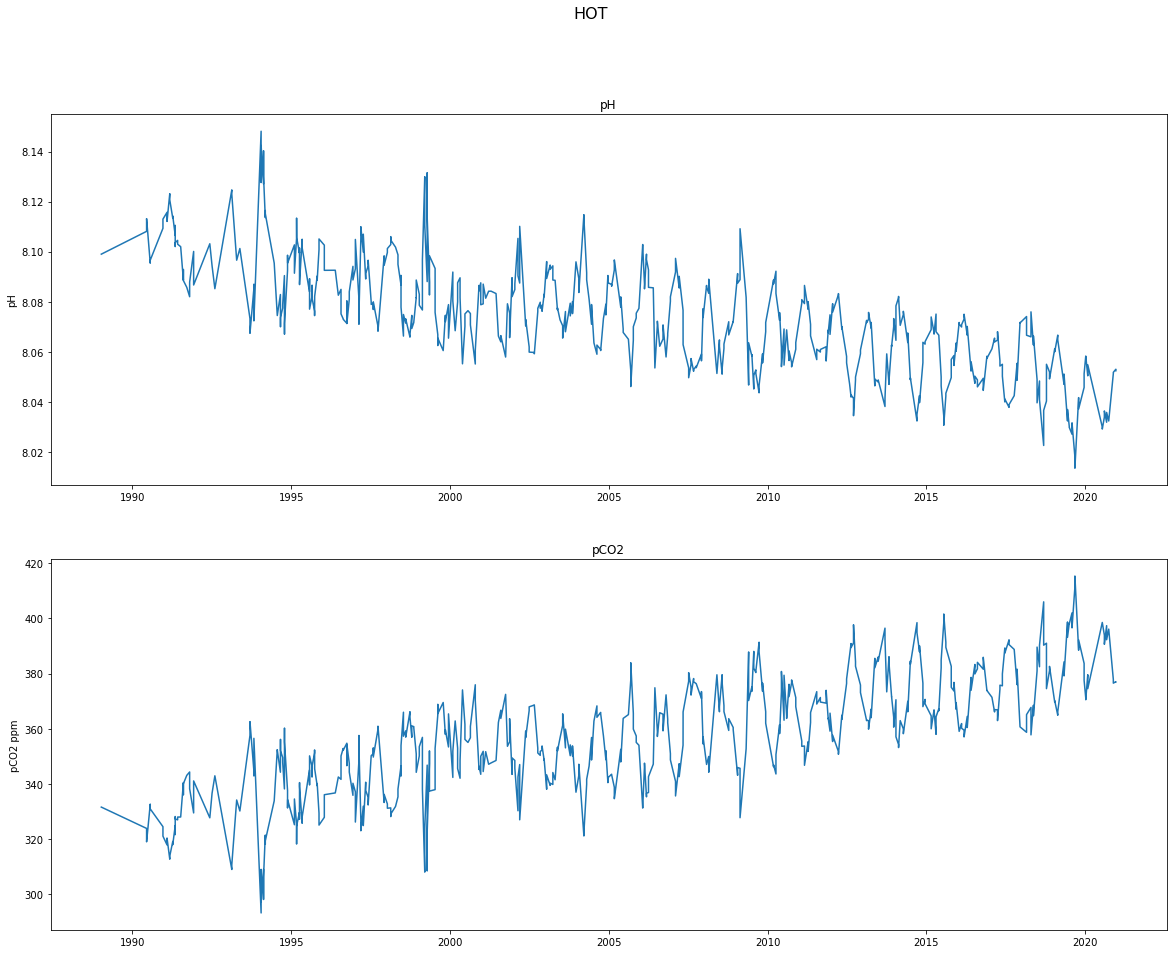

In [7]:
fig1, (ax1, ax2) = plt.subplots(2,1,figsize = (20,15)) 
# pH
ax1.plot(HOTdates, HOT['pH']) #plotting pH
ax1.xaxis.set_major_locator(mdates.YearLocator(5)) #plot by 5 years                       
ax1.set_ylabel('pH') # y axis
ax1.set_title('pH') #subplot title                                                                     
# pCO2
ax2.plot(HOTdates, HOT['pCO2']) #plotting pCO2
ax2.xaxis.set_major_locator(mdates.YearLocator(5)) #by every 5 years                             
ax2.set_ylabel('pCO2 ppm') # y axis
ax2.set_title("pCO2") #subplot title
fig1.suptitle("", fontsize = 16) #figure title

### Answer the following questions:

13. Describe any long-term trends you can see in pH and pCO2.


14. Does it look like there is a relationship between pH and pCO2? If so, is the relationship positive or negative? Explain why.


In [ ]:
##13. Yes, decreasing for pH and increasing for pCO2.

##14. Yes, negative relationship. 
#This is because as pCO2 rises, more CO2 is absorbed into the ocean, 
#causing chemical reactions that create more hydrogen ions, thus lowering pH

## <center>Plotting trend lines

We can see from the plots above that there are visually apparent trends for pH and pCO2. But can we quantify those trends? Let's use a simple linear regression to quantify the trends, as we discussed in lecture.


1. Fit the pH data from HOT to a linear regression using the code below. **Read the comments to understand what the code is doing**

Note that  we are using datenum (our serialized datetimes) for our x variable. Fitting a regression will not work with a datetime object. We need to arrange the x variable into an array with shape (-1, 1). *We need to reshape the array because for the regression model to run, the x variable must have one column and as many rows as necessary.*

`x = np.array(HOT['datenum']).reshape((-1,1)) # define x as your datenum variable
y = np.array(HOT['pH']) # define pH as y. This does not need to be reshaped
modelpH = LinearRegression().fit(x, y) # execute the code that will fit a line to your x and y
fit_pH = modelpH.predict(x) # define fit_pH as the predicted y values from the regression model`

Let's also run these lines of code, which will give us our R^2 value, which is the coefficient of determination (how much variability the model explains), and our slope and intercept for our regression model line.

`r_sq = modelpH.score(x, y) # define r_sq as the score of your regression model, which is the coefficient of determination
print(f"coefficient of determination: {r_sq}") # print the R^2 value of the regression model
print(f"intercept: {modelpH.intercept_}") # print the intercept of the regression model, which is the b term in y = mx+b
print(f"slope: {modelpH.coef_}") # print the slope of the regression model, which is the m term in y = mx +b`


In [8]:
##1
x = np.array(HOT['datenum']).reshape((-1,1)) # make (np.array) and reshape (reshape) the array
y = np.array(HOT['pH']) # define pH as y. This does not need to be reshaped.
modelpH = LinearRegression().fit(x, y) # execute the code that will fit a line to your x and y
fit_pH = modelpH.predict(x) # define fit_pH as the predicted y values from the regression model

r_sq = modelpH.score(x, y) # define r_sq as the score of your regression model, which is the coefficient of determination
print(f"coefficient of determination: {r_sq}") # print the R^2 value of the regression model
print(f"intercept: {modelpH.intercept_}") # print the intercept of the regression model, which is the b term in y = mx+b
print(f"slope: {modelpH.coef_}") # print the slope of the regression model, which is the m term in y = mx +b


coefficient of determination: 0.5427732261748501
intercept: 11.7328189555854
slope: [-4.99421173e-06]


### Fit regression model for pCO2 at HOT

Now let's also run a regression model for pCO2. 

2. Use the same code as for #1, but change y to an array for pCO2, and change the name of the predicted y values to `fit_pCO2`. Change `modelpH` to `modelpCO2`.

In [9]:
##2
x2 = np.array(HOT['datenum']).reshape((-1,1)) #define x as your dates
y2 = np.array(HOT['pCO2']) # define pCO2 as y. This does not need to be reshaped.
modelpCO2 = LinearRegression().fit(x2, y2) # execute the code that will fit a line to your x and y
fit_pCO2 = modelpCO2.predict(x2) # define fit_pCO2 as the predicted y values from the regression model
r_sq = modelpCO2.score(x2, y2) # define r_sq as the score of your regression model, which is the R2 value 
print(f"coefficient of determination: {r_sq}") #print R^2
print(f"intercept: {modelpCO2.intercept_}") #print the intercept of the regression model, which is the b term in y = mx+b
print(f"slope: {modelpCO2.coef_}") #print the slope of the regression model, which is the m term in y = mx +b


coefficient of determination: 0.600899683006549
intercept: -3381.8706982022213
slope: [0.00510392]


### Plot regression model trend lines with observed data

Great, now let's see what these trend lines look like with the observed data. 

3. Rerun the plots of pH and pCO2 at HOT with the trend lines for pH and pCO2 by adding the following code. Make sure to insert the lines of code where it makes the most sense with the rest of the code. 

`ax1.plot(HOTdates, fit_pH) #note that we are now plotting the fitted y values with the datetime object`

and

`ax2.plot(HOTdates, fit_pCO2)`

Text(0.5, 0.98, 'HOT')

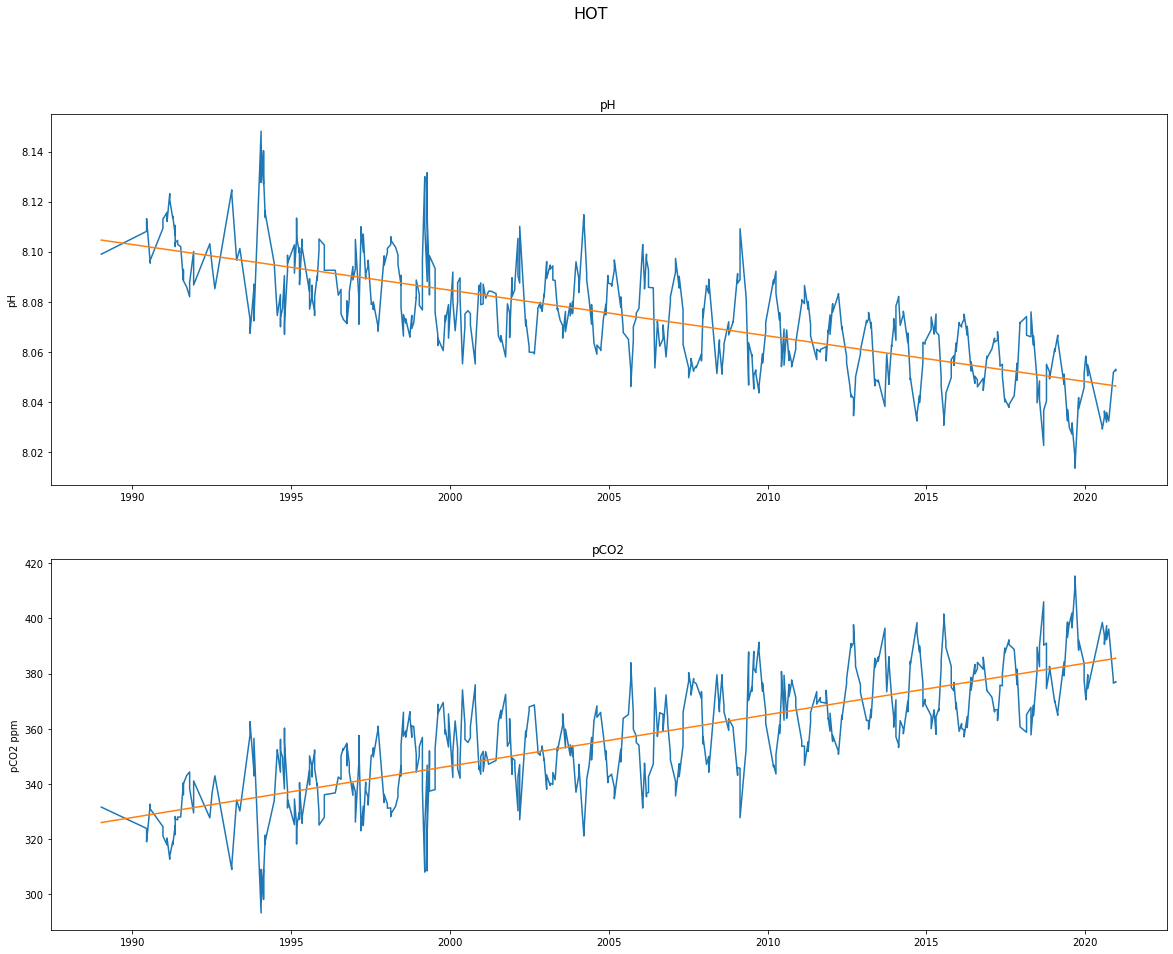

In [10]:
##3
fig1, (ax1, ax2) = plt.subplots(2,1,figsize = (20,15)) 
# pH
ax1.plot(HOTdates, HOT['pH']) #creating pH plot
ax1.plot(HOTdates, fit_pH)
ax1.xaxis.set_major_locator(mdates.YearLocator(5)) #by every 5 years                              
ax1.set_ylabel('pH') # y axis
ax1.set_title("pH") #subplot title                                                          
# pCO2
ax2.plot(HOTdates, HOT['pCO2']) #creating pCO2 plot
ax2.plot(HOTdates, fit_pCO2)
ax2.xaxis.set_major_locator(mdates.YearLocator(5)) #by every 5 years                              
ax2.set_ylabel('pCO2 ppm') # y axis
ax2.set_title("pCO2") #subplot title
fig1.suptitle("HOT", fontsize = 16) #plot title|

### What will pH be at the end of century?

If the trends for pH and pCO2 continue, then the ocean pH will continue decreasing as we head into the end of the century.


4. According to the regression model, what was the change in pH from 2000 to 2020? What will the pH be in 2100?


We can use the `predict()` command with our regression model to figure this out. Execute the code below and read the comments:

`
date1 = (date.toordinal(date(2000,1,1))) # define date; date.toordinal changes the date to serial date number 
date2 = (date.toordinal(date(2020,1,1))) #define date
date3 = (date.toordinal(date(2100,1,1))) # define date
dates = [date1, date2, date3] # make an array with the above dates
dates = np.array(dates) #make the array useable by the numpy package
datesarray = dates.reshape((-1,1)) # reshape the array
fit_pH = modelpH.predict(datesarray) #execute the predict() command on datesarray
fit_pH #prints out the resulting pHs for the three dates; the pH for 2000 is first, then 2020, then 2100`

In [ ]:
##4. Change in pH from 2000 to 2020 was 0.04 pH units, pH is at 7.9 in 2100
date1 = (date.toordinal(date(2000,1,1))) # define date; date.toordinal changes the date to serial date number 
date2 = (date.toordinal(date(2020,1,1))) #define date
date3 = (date.toordinal(date(2100,1,1))) # define date
dates = [date1, date2, date3] # make an array with the above dates
dates = np.array(dates) #make the array useable by the numpy package
datesarray = dates.reshape((-1,1)) # reshape the array
fit_pH = modelpH.predict(datesarray) #execute the predict() command on datesarray
fit_pH #prints out the resulting pHs for the three dates; the pH for 2000 is first, then 2020, then 2100


### Are the changes in pH significant?

5. Is the change in ocean pH from 2000 to 2020 significant? Why or why not? 


6. Recall that pH unit is on a log scale, so that pH = -log[H+]. 

In the 1800s (pre-Industrial era), the ocean pH was 8.2, which is equivalent to $6.3 * 10^{-9} moles/L$. 

If in 2100 the ocean pH is 7.9, which is equivalent to $1.3 * 10^{-8} moles/L$, how much more acidic is the ocean in 2100 from the 1800s? Is this a significant increase in acidity?

*Hint:* how many times greater is $1.3 * 10^{-8} moles/L$ than $6.3 * 10^{-9} moles/L$?


In [13]:
##5.  Yes this is a significant decrease, 
#because pH is on a logarithmic scale so each unit on the scale represents a 10 fold difference.

##6. (1.3*10^-8)/(6.3*10^-9) = 1.3/.63 = 2.06. 2 times more acidic. 
#Extremely significant, more than a 100% increase in acidity.


array([8.08644509, 8.04996237, 7.9040315 ])

### What are the rates of change of pH and pCO2?

We can use the regression models to determine an approximate rate at which pH and pCO2 are changing. The rate would be m, the slope of each regression line.

*However*, we created our regression models using seralized date numbers, so the slope that we printed out for our regression models were not based in units of change per year.

We can still use the regression model equations to figure out the rate of change per year, remembering that slope can also be calculated by the equation: 

    
$$m=\frac{y2-y1}{x2-x1}$$

    
7. Using the change in pH (y2-y1) from 2000 to 2020 (x2-x1) that we calculated in #4, determine the change in pH per year.
    

8. Now let's determine the rate of change of pCO2. We'll use the same `predict()` command as we did with the pH regression model. We can run the `predict()` command on the same set of dates we defined for the pH regression model, but use the pCO2 model instead. Execute the code below to determine the pCO2 levels in 2000 and 2020:
    
`fit_pCO2 = modelpCO2.predict(datesarray) # recall that datesarray is dates 1/1/2000, 1/1/2020, and 1/1/2100
fit_pCO2   # this will give you an array of pCO2 in 2000, 2020, and 2100`
    

9. Now calculate the change in pCO2 per year using the same method as in #7. 




In [14]:
##7. (8.04996237-8.08644509)/20 = -0.0018 pH units per year

##8. 
fit_pCO2 = modelpCO2.predict(datesarray) # recall that datesarray is an array of the dates 2000, 2020, and 2100
fit_pCO2   # this will give you an array of pCO2 in 2000, 2020, and 2100`

##9. (381.88-344.60)/20 = 1.86 ppm pCO2 per year


array([344.6031233 , 381.88725641, 531.02378885])


    
# <center>YOU SURVIVED ANOTHER PYTHON ASSIGNMENT!! CONGRATULATIONS!!!

